In [36]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 3
np.random.seed(0)

In [6]:
dice_data = np.array([1,2,3,4,5,6])
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)

for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, 'が出る確率', p)

1 が出る確率 0.145
2 が出る確率 0.166
3 が出る確率 0.165
4 が出る確率 0.191
5 が出る確率 0.161
6 が出る確率 0.172


[0.149 0.173 0.166 0.157 0.176 0.179]


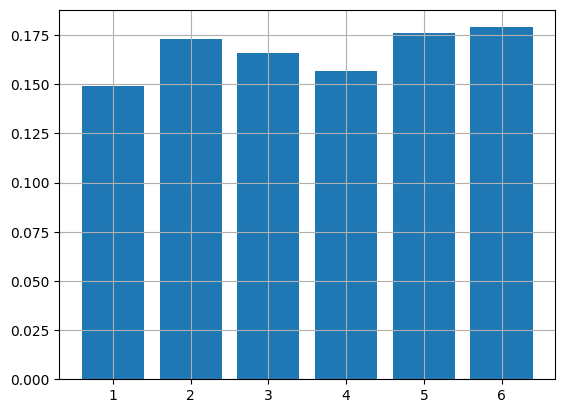

In [21]:
dice_data = np.array([1,2,3,4,5,6])
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)

prob_data = np.array([])
for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, p)
print(prob_data)
plt.bar(dice_data, prob_data)
plt.grid(True)

[0.571 0.429]


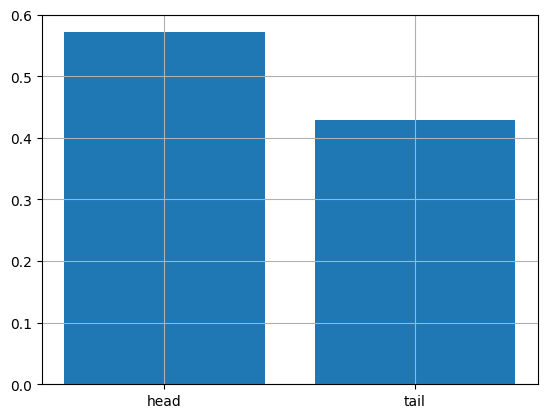

In [23]:
prob_data = np.array([])
coin_data = np.array([0,0,0,0,1,1,1])

for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    prob_data = np.append(prob_data, p)
print(prob_data)
plt.bar([0,1], prob_data, align='center')
plt.xticks([0,1], ['head', 'tail'])
plt.grid(True)

In [24]:
student_data_mat = pd.read_csv('datasets/student-mat.csv', sep=';') # separater

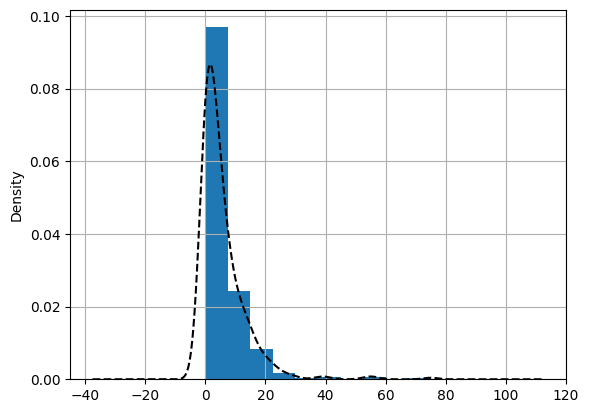

In [28]:
student_data_mat.absences.plot(kind='kde', style='k--')
student_data_mat.absences.hist(density=True)
plt.grid(True)

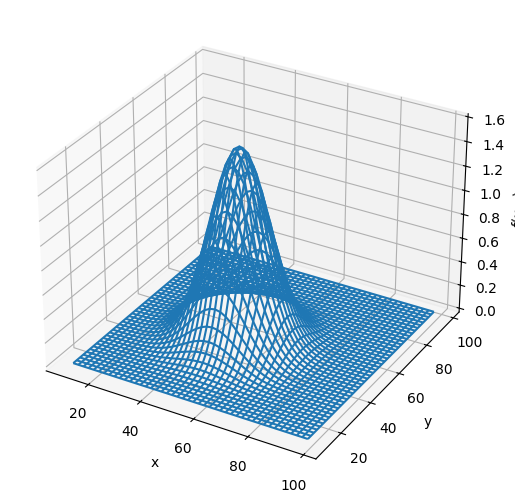

In [54]:
from mpl_toolkits.mplot3d import Axes3D

x, y = np.mgrid[10:100:2, 10:100:2]
pos = np.empty(x.shape + (2, ))
pos[:, :, 0] = x
pos[:, :, 1] = y

rv = sp.stats.multivariate_normal([50,50],[[100,0],[0,100]])
z = rv.pdf(pos)

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
plt.grid(True)

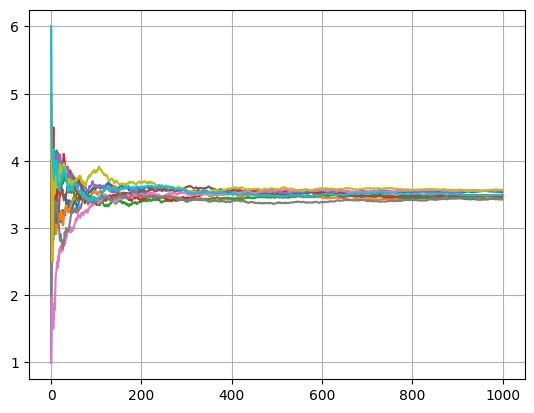

In [58]:
# 大数の法則
calc_time = 1000
sample = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1, calc_time + 1)

for i in range(10):
    p = np.random.choice(sample, calc_time).cumsum()
    plt.plot(p / number_cnt)

plt.grid(True)

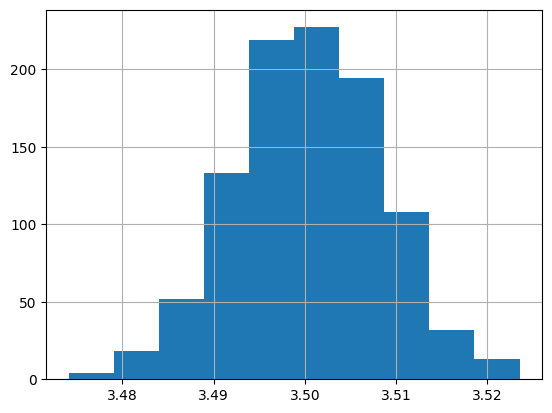

In [73]:
# 中心極限定理

def central_theory(n):
    sample = np.array([1,2,3,4,5,6])
    mean = np.array([])

    for i in range(1000):
        cum_var = np.random.choice(sample, n).cumsum()*1.0
        mean = np.append(mean, cum_var[n-1]/n)
    plt.hist(mean)
    plt.grid(True)

central_theory(50000)

In [82]:
student_data_por = pd.read_csv('datasets/student-por.csv', sep=';')
all_student_data = pd.merge(student_data_mat, student_data_por,
                           on=[
                               'school',
                               'sex',
                               'age',
                               'address',
                               'famsize',
                               'Pstatus',
                               'Medu',
                               'Fedu',
                               'Mjob',
                               'Fjob',
                               'reason',
                               'nursery',
                               'internet'],
                           suffixes=('_math','_por'))
print(all_student_data.G1_math.mean())
print(all_student_data.G1_por.mean())

10.861256544502618
12.112565445026178


In [84]:
t, p = sp.stats.ttest_rel(all_student_data.G1_math, all_student_data.G1_por)
print(t,p)

-8.63274445728648 1.6536555217101022e-16
